<a href="https://colab.research.google.com/github/bdwivedi/ml-vision-brij/blob/main/cnn_hrs_hmn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import urllib.request
import zipfile
import os

In [2]:
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/horse-or-human.zip \
    -O /tmp/horse-or-human.zip

--2021-12-17 17:38:28--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/horse-or-human.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.133.128, 74.125.140.128, 108.177.15.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.133.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 149574867 (143M) [application/zip]
Saving to: ‘/tmp/horse-or-human.zip’

/tmp/horse-or-human 100%[===================>] 142.65M  21.3MB/s    in 6.7s    

2021-12-17 17:38:37 (21.3 MB/s) - ‘/tmp/horse-or-human.zip’ saved [149574867/149574867]



In [3]:
# url = "https://storage.googleapis.com/laurencemoroney-blog.appspot.com/horse-or-human.zip"

In [4]:
# file_name = "horse-or-human.zip"
# training_dir = 'horse-or-human/training'
# urllib.request.urlretrieve(url,file_name)

In [5]:
local_zip = '/tmp/horse-or-human.zip'


In [6]:
zip_ref = zipfile.ZipFile(local_zip,'r')
zip_ref.extractall('/tmp/horse-or-human')
zip_ref.close()

In [7]:
train_horse_dir = os.path.join('/tmp/horse-or-human/horses')
train_human_dir = os.path.join('/tmp/horse-or-human/humans')

In [8]:
train_horse_name = os.listdir(train_horse_dir)
print(train_horse_name[:10])

train_human_name = os.listdir(train_human_dir)
print(train_human_name[:10])

['horse48-5.png', 'horse04-4.png', 'horse36-6.png', 'horse13-8.png', 'horse45-4.png', 'horse10-4.png', 'horse11-3.png', 'horse13-9.png', 'horse45-1.png', 'horse04-8.png']
['human03-28.png', 'human03-23.png', 'human13-10.png', 'human10-03.png', 'human12-15.png', 'human02-23.png', 'human04-08.png', 'human12-04.png', 'human09-15.png', 'human14-26.png']


In [9]:
print('total training horse images:', len(os.listdir(train_horse_dir)))
print('total training human images:', len(os.listdir(train_human_dir)))

total training horse images: 500
total training human images: 527


In [10]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

nrows = 4
ncols = 4

pic_index = 0



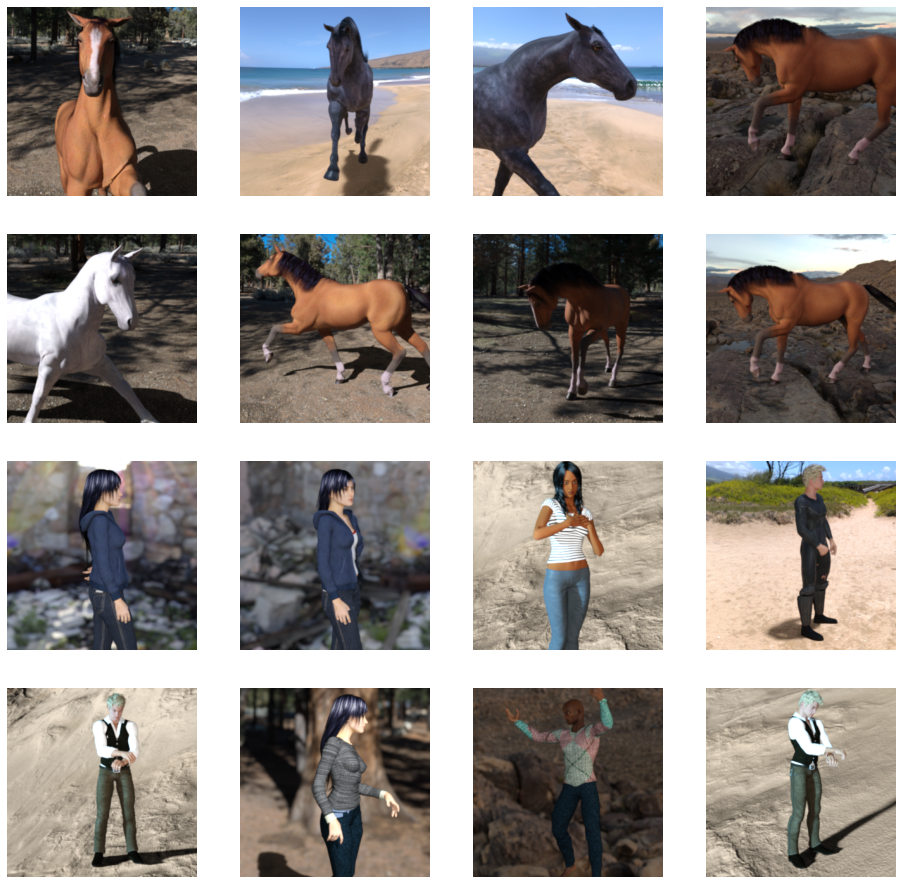

In [11]:
fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

pic_index += 8

next_horse_pix = [os.path.join(train_horse_dir,fname) for fname in train_horse_name[pic_index-8:pic_index]]
next_human_pix = [os.path.join(train_human_dir, fname) for fname in train_human_name[pic_index-8:pic_index]]
#print(next_horse_pix)
for i, img_path in enumerate(next_horse_pix + next_human_pix):
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('off')

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

In [12]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [13]:
train_datagen = ImageDataGenerator(rescale = 1/255)

In [15]:
# train_generator = train_datagen.flow_from_directory(training_dir,
#                                                     target_size = (300,300),
#                                                     class_mode = 'binary')

In [16]:
import tensorflow as tf
from tensorflow import keras


In [17]:
model = tf.keras.models.Sequential([
      tf.keras.layers.Conv2D(16, (3,3), activation='relu' ,
                  input_shape=(300, 300, 3)),
      tf.keras.layers.MaxPooling2D(2, 2),

      tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
      tf.keras.layers.MaxPooling2D(2,2),

      tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
      tf.keras.layers.MaxPooling2D(2,2),

      tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
      tf.keras.layers.MaxPooling2D(2,2),

      tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
      tf.keras.layers.MaxPooling2D(2,2),
      
      tf.keras.layers.Flatten(),
      tf.keras.layers.Dense(512, activation='relu'),
      tf.keras.layers.Dense(1, activation='sigmoid')
])

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 298, 298, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 149, 149, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 147, 147, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 73, 73, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 71, 71, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 35, 35, 64)       0

In [19]:
model.compile(loss='binary_crossentropy',
              optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.001),
              metrics=['accuracy'])

### Data Pre processing

In [20]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1/255)

train_generator = train_datagen.flow_from_directory('/tmp/horse-or-human',
                                                    target_size = (300,300),
                                                    batch_size = 128,
                                                    class_mode = 'binary')

Found 1027 images belonging to 2 classes.


In [21]:
# history = model.fit_generator(
#       train_generator,
#       epochs=15
# )
history = model.fit(train_generator,
                    steps_per_epoch=8,
                    epochs=15,
                    verbose=1)

Epoch 1/15
8/8 [==============================] - 19s 779ms/step - loss: 0.9129 - accuracy: 0.5072
Epoch 2/15
8/8 [==============================] - 7s 876ms/step - loss: 0.7041 - accuracy: 0.6096
Epoch 3/15
8/8 [==============================] - 7s 811ms/step - loss: 0.5919 - accuracy: 0.6897
Epoch 4/15
8/8 [==============================] - 7s 859ms/step - loss: 0.5769 - accuracy: 0.7642
Epoch 5/15
8/8 [==============================] - 7s 856ms/step - loss: 0.4542 - accuracy: 0.8065
Epoch 6/15
8/8 [==============================] - 7s 809ms/step - loss: 0.3911 - accuracy: 0.8910
Epoch 7/15
8/8 [==============================] - 7s 848ms/step - loss: 0.2613 - accuracy: 0.9177
Epoch 8/15
8/8 [==============================] - 7s 845ms/step - loss: 0.1437 - accuracy: 0.9433
Epoch 9/15
8/8 [==============================] - 7s 802ms/step - loss: 0.1256 - accuracy: 0.9611
Epoch 10/15
8/8 [==============================] - 7s 835ms/step - loss: 0.1770 - accuracy: 0.9410
Epoch 11/15
8/8 [=

In [22]:
validation_url = "https://storage.googleapis.com/laurencemoroney-blog.appspot.com/validation-horse-or-human.zip"
validation_file_name = "validation-horse-or-human.zip"
validation_dir = 'horse-or-human/validation/'
urllib.request.urlretrieve(validation_url, validation_file_name)
zip_ref = zipfile.ZipFile(validation_file_name, 'r')
zip_ref.extractall(validation_dir)
zip_ref.close()

In [23]:
validation_datagen = ImageDataGenerator(rescale = 1/255)

In [24]:
validation_generator = validation_datagen.flow_from_directory(validation_dir,
                                                              target_size=(300,300),
                                                              class_mode = 'binary')

Found 256 images belonging to 2 classes.


In [25]:
history = model.fit(train_generator, epochs= 15, validation_data=validation_generator)

Epoch 1/15
9/9 [==============================] - 10s 1s/step - loss: 0.0095 - accuracy: 0.9971 - val_loss: 1.3395 - val_accuracy: 0.8516
Epoch 2/15
9/9 [==============================] - 9s 986ms/step - loss: 0.0027 - accuracy: 1.0000 - val_loss: 1.9162 - val_accuracy: 0.8516
Epoch 3/15
9/9 [==============================] - 9s 992ms/step - loss: 6.5680e-04 - accuracy: 1.0000 - val_loss: 2.0623 - val_accuracy: 0.8594
Epoch 4/15
9/9 [==============================] - 9s 979ms/step - loss: 2.6212e-04 - accuracy: 1.0000 - val_loss: 2.3719 - val_accuracy: 0.8438
Epoch 5/15
9/9 [==============================] - 9s 980ms/step - loss: 1.4278e-04 - accuracy: 1.0000 - val_loss: 2.3353 - val_accuracy: 0.8594
Epoch 6/15
9/9 [==============================] - 9s 1s/step - loss: 7.8595e-05 - accuracy: 1.0000 - val_loss: 2.7295 - val_accuracy: 0.8477
Epoch 7/15
9/9 [==============================] - 9s 984ms/step - loss: 3.8236e-05 - accuracy: 1.0000 - val_loss: 2.7312 - val_accuracy: 0.8477
Epoch

In [26]:
import numpy as np
from google.colab import files
from keras.preprocessing import image

In [27]:
uploaded = files.upload()

Saving beautiful.jpeg to beautiful.jpeg
Saving girl.jpeg to girl.jpeg
Saving horse.jpeg to horse.jpeg
Saving woman-horse.jpeg to woman-horse.jpeg


In [32]:
uploaded.keys()

dict_keys(['beautiful.jpeg', 'girl.jpeg', 'horse.jpeg', 'woman-horse.jpeg'])

In [33]:
for fn in uploaded.keys():
  path = '/content/' + fn
  img = image.load_img(path, target_size=(300,300))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  image_tensor = np.vstack([x])
  classes = model.predict(image_tensor)
  print(classes)
  print(classes[0])
  if classes[0] > 0.5:
    print(fn + " is human")
  else:
    print(fn + " is horse")

[[0.]]
[0.]
beautiful.jpeg is horse
[[1.]]
[1.]
girl.jpeg is human
[[1.]]
[1.]
horse.jpeg is human
[[0.]]
[0.]
woman-horse.jpeg is horse


In [42]:
model.layers[1].name

'max_pooling2d'

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:43: RuntimeWarning: invalid value encountered in true_divide


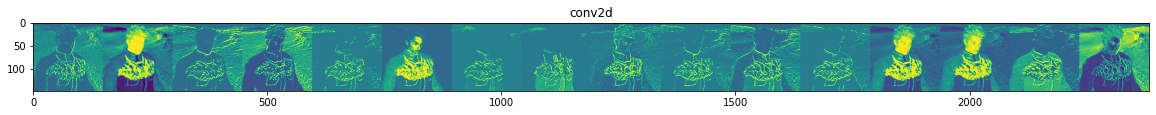

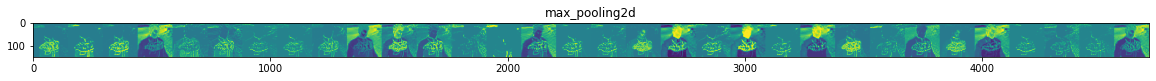

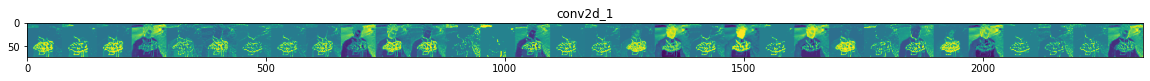

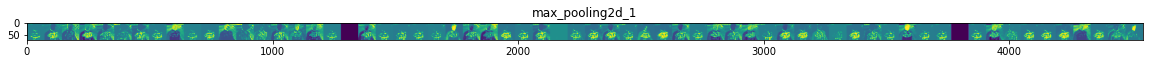

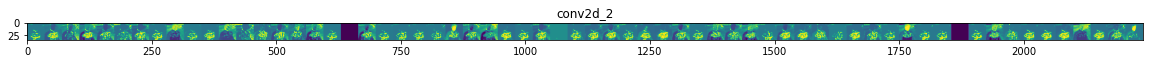

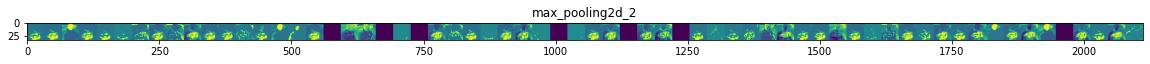

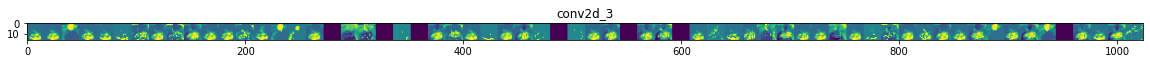

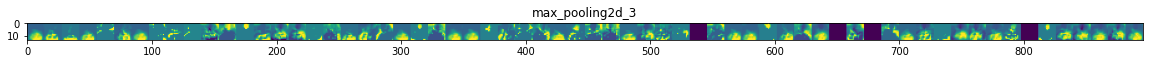

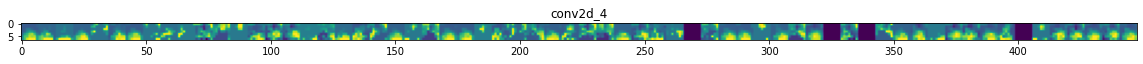

In [29]:
import numpy as np
import random
from tensorflow.keras.preprocessing.image import img_to_array, load_img

# Let's define a new Model that will take an image as input, and will output
# intermediate representations for all layers in the previous model after
# the first.
successive_outputs = [layer.output for layer in model.layers[1:]]
#visualization_model = Model(img_input, successive_outputs)
visualization_model = tf.keras.models.Model(inputs = model.input, outputs = successive_outputs)
# Let's prepare a random input image from the training set.
horse_img_files = [os.path.join(train_horse_dir, f) for f in train_horse_name]
human_img_files = [os.path.join(train_human_dir, f) for f in train_human_name]
img_path = random.choice(horse_img_files + human_img_files)

img = load_img(img_path, target_size=(300, 300))  # this is a PIL image
x = img_to_array(img)  # Numpy array with shape (150, 150, 3)
x = x.reshape((1,) + x.shape)  # Numpy array with shape (1, 150, 150, 3)

# Rescale by 1/255
x /= 255

# Let's run our image through our network, thus obtaining all
# intermediate representations for this image.
successive_feature_maps = visualization_model.predict(x)

# These are the names of the layers, so can have them as part of our plot
layer_names = [layer.name for layer in model.layers]

# Now let's display our representations
for layer_name, feature_map in zip(layer_names, successive_feature_maps):
  if len(feature_map.shape) == 4:
    # Just do this for the conv / maxpool layers, not the fully-connected layers
    n_features = feature_map.shape[-1]  # number of features in feature map
    # The feature map has shape (1, size, size, n_features)
    size = feature_map.shape[1]
    # We will tile our images in this matrix
    display_grid = np.zeros((size, size * n_features))
    for i in range(n_features):
      # Postprocess the feature to make it visually palatable
      x = feature_map[0, :, :, i]
      x -= x.mean()
      x /= x.std()
      x *= 64
      x += 128
      x = np.clip(x, 0, 255).astype('uint8')
      # We'll tile each filter into this big horizontal grid
      display_grid[:, i * size : (i + 1) * size] = x
    # Display the grid
    scale = 20. / n_features
    plt.figure(figsize=(scale * n_features, scale))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')

In [ ]:
# import os, signal
# os.kill(os.getpid(), signal.SIGKILL)